In [0]:
    from google.colab import files #Subir archivos a google colab
    files.upload()

# Práctica 4 : Máquinas de vectores soporte
    Por: Jesús Rioja Bravo (i52ribrj@uco.es)

**Pregunta 1: Abre este script y explica su contenido.**

Lo primero que se realiza en este script es cargar los módulos necesarios para la correcta ejecución del código.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm

A continuación se procede a cargar el dataset utilizando el módulo pandas (pd).

In [0]:
# Cargar el dataset
data = pd.read_csv('dataset1.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

Tras esto, procedemos a entrenar nuestro modelo SVM. Para esto, creamos un objeto de tipo SVM utlizando el kernel "linear", lo que significa que utilizaremos funciones lineales para dividir los diferentes patrones del dataset. El kernel puede ser de tipo 'linear', 'rbf', 'poly' o 'sigmoid'. Además del kernel, hemos puesto un valor de 200 al parámetro 'C', el cual indica cuánto se penaliza un error de clasificación.

In [0]:
# Entrenar el modelo SVM
svm_model = svm.SVC(kernel='linear',C=200)
svm_model.fit(X, y)

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Tras el entrenamiento, se procede a mostrar los resultados obtenidos mediante un gráfico.

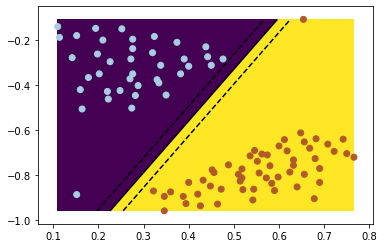

In [0]:
# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Representar el hiperplano separador
plt.axis('tight')
# Extraer lÃ­mites
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Hacer un plot a color con los resultados
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

plt.show()

**Pregunta 2:  Intuitivamente, ¿qué hiperplano crees que incurrirá en un menor error de test en la tarea de separar las dos clases de puntos?**


Un hiperplano que separase ambas clases teniendo sólo en cuenta los grandes grupos de puntos, y omitiendo los puntos alejados, ya que estos se pueden considerar outlayers, cosa que a la hora de entrenamiento mejora los resultados pero empeora a la hora de generalizar

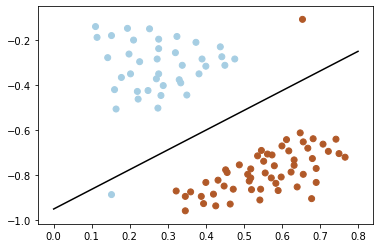

In [0]:
# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)
plt.plot([0, 0.8], [-0.95, -0.25], color='black')


**Pregunta 3: Modiﬁca el script probando varios valores de C. Observa qué sucede, explica porqué y escoge el valor más adecuado.**


Con valores demasiado bajos (0.01, 0.1), castiga muy poco el error de clasificación y clasifica todos los patrones como de una sola clase. Con valores de 1 y 10 ya si que comienza a dividir las clases correctamente, pero omite los puntos outliers. De 100 en adelante clasifica correctamente tanto las zonas pobladas como los outliers.
Para obtener una buena clasificación, quizás fuese óptimo no clasificar los outliers, por lo que un buen valor de C podría ser 10, y, si queremos clasificar los outliers, 100.

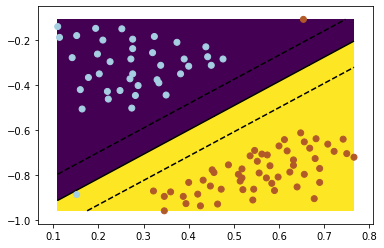

In [0]:
# Entrenar el modelo SVM
svm_model = svm.SVC(kernel='linear',C=10)
svm_model.fit(X, y)

# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Representar el hiperplano separador
plt.axis('tight')
# Extraer lí­mites
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Hacer un plot a color con los resultados
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

plt.show()

**Pregunta 4: Prueba a lanzar una SVM lineal con los valores para C que se utilizaron en la pregunta anterior. ¿Consigues algún resultado satisfactorio en el sentido de que no haya errores en el conjunto de entrenamiento?. ¿Por qué?.**

Cargamos el segundo dataset.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm

# Cargar el dataset
data = pd.read_csv('dataset2.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

No es posible obtener unos buenos resultados, ya que siempre clasifica todos los patrones como de la misma clase. Esto se debe no al parámetro C, si no al tipo de kernel que estamos utilizando ('lineal'), ya que este es demasiado simple como para poder clasificar correctamente este dataset, cuyos patrones se distribuyen de una forma más compleja que el primer dataset. Hay unos patrones que "rodean" a los de la otra clase.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: No contour levels were found within the data range.


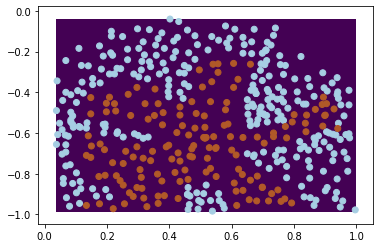

In [0]:
# Entrenar el modelo SVM
svm_model = svm.SVC(kernel='linear',C=1000)
svm_model.fit(X, y)

# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Representar el hiperplano separador
plt.axis('tight')
# Extraer lÃ­mites
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Hacer un plot a color con los resultados
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

plt.show()

**Pregunta 5: Propón una conﬁguración de SVM no lineal (utilizando el kernel tipo RBF o Gaussiano) que resuelva el problema.**

Probando distintas combinaciones de patrones, se llega a la conclusión de que el mejor resultado se obtiene con C = 200 y Gamma = 100. Con estos valores obtenemos un resultado bastante bueno en entrenamiento sin llegar a sobreentrenar. 

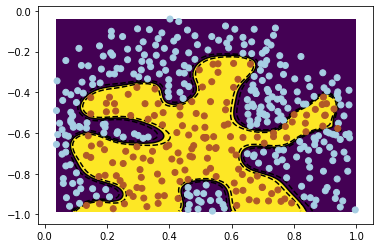

In [0]:
# Entrenar el modelo SVM
svm_model = svm.SVC(kernel='rbf',C=200, gamma=100)
svm_model.fit(X, y)

# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Representar el hiperplano separador
plt.axis('tight')
# Extraer lÃ­mites
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Hacer un plot a color con los resultados
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

plt.show()

Si queremos sobreentrenar nos basta con, por ejemplo, aumentar el parámetro Gamma a 1000. Tambien podemos aumentar al parámetro C. Como podemos obsrvar, ahora el área amarilla se ajusta demasiado a los patrones.

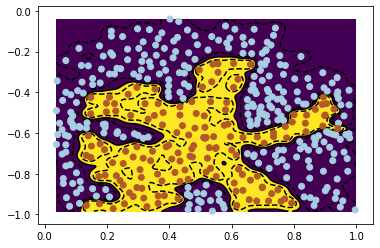

In [0]:
# Entrenar el modelo SVM
svm_model = svm.SVC(kernel='rbf',C=200, gamma=1000)
svm_model.fit(X, y)

# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Representar el hiperplano separador
plt.axis('tight')
# Extraer lÃ­mites
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Hacer un plot a color con los resultados
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

plt.show()

Para obtener infraentrenamiento nos basta con disminuir el valor de el parámetro gamma y C, para que así se castiguen menos los errores. Gamma = 1 y C = 10

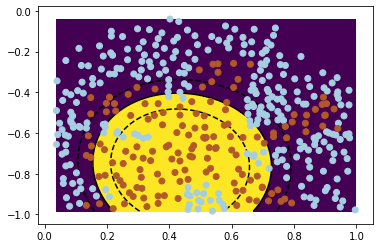

In [0]:
# Entrenar el modelo SVM
svm_model = svm.SVC(kernel='rbf',C=10, gamma=1)
svm_model.fit(X, y)

# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Representar el hiperplano separador
plt.axis('tight')
# Extraer lÃ­mites
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Hacer un plot a color con los resultados
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

plt.show()

**Pregunta 6:  En este caso, ¿es el dataset linealmente separable?. A primera vista, ¿detectas puntos que presumiblemente sean outliers?, ¿por qué?.** 

Primero cargamos el tercer dataset.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm

# Cargar el dataset
data = pd.read_csv('dataset3.csv',header=None)
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

Se observa claramente que el problema no es linearmente separable, por lo que habría que aplicar alguna transformación para así obtener hiperplanos separables.

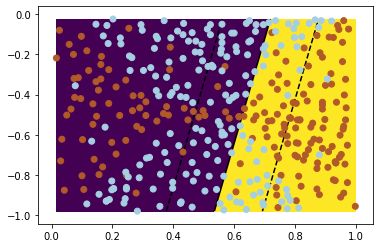

In [0]:
# Entrenar el modelo SVM
svm_model = svm.SVC(kernel='linear',C=200)
svm_model.fit(X, y)

# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Representar el hiperplano separador
plt.axis('tight')
# Extraer lÃ­mites
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Hacer un plot a color con los resultados
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

plt.show()

Los hiperplanos deberían de tener aproximadamente la siguiente forma.

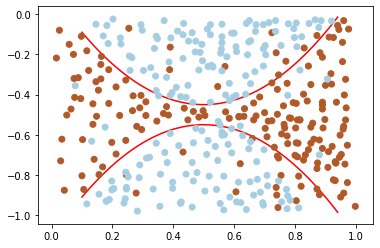

In [0]:
# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Hiperplanos
x_par = np.arange(0.1, 0.95, 0.01)
y_par = ((x_par - 0.5) * 1.5) ** 2 - 0.45
plt.plot(x_par, y_par, color='red')
plt.plot(x_par, -1 * y_par - 1, color='red')

Al hacer la representación de los supuestos hiperplanos, es más claro el observar que sí que existen ciertos outliers, tanto de la clase azul dentro de la zona naranja como de la clase naranja en la zona azul. Para realizar una buena generalización, debemos llegar a un clasificador que no tome estos parámetros en cuenta.


**Pregunta 7:  Lanza una SVM para clasiﬁcar los datos, con objeto de obtener un resultado lo más parecido al de la Figura 5. Ajusta el ancho del kernel en el intervalo γ ∈ {0,02, 0,2, 2, 200}. Ajusta el parámetro de coste en el intervalo C ∈ {0,02, 0,2, 2, 200}. Establece el valor de los parámetros óptimos. Además, incluye un ejemplo de una conﬁguración de parámetros que produzca sobre-entrenamiento y otra que produzca infraentrenamiento**

El mejor clasificador posible se obtiene con unos parámetros de C = 20 y Gamma = 20. Este es además el más parecido a la figura 5.

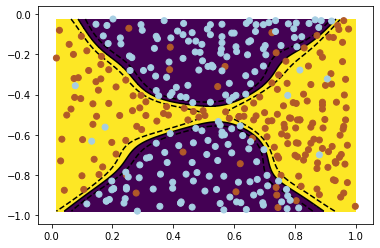

In [0]:
# Entrenar el modelo SVM
svm_model = svm.SVC(kernel='rbf',C=20, gamma=20)
svm_model.fit(X, y)

# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Representar el hiperplano separador
plt.axis('tight')
# Extraer lÃ­mites
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Hacer un plot a color con los resultados
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

plt.show()

Para obtener sobreentrenamiento solo tenemos que aumentar los parámetros C y Gamma. Ya que así se castigará más cualquier error de clasificación y se tomarán en cuenta los outliers. C = 200 y Gamma = 200.

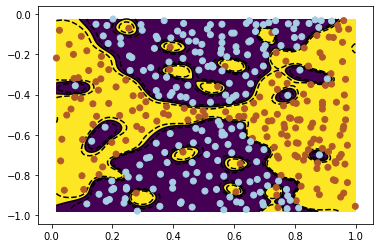

In [0]:

svm_model = svm.SVC(kernel='rbf',C=200, gamma=200)
svm_model.fit(X, y)

# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Representar el hiperplano separador
plt.axis('tight')
# Extraer lÃ­mites
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Hacer un plot a color con los resultados
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

plt.show()

Con c = 2 y Gamma = 2 (o valores inferiores), ya se obtiene un infraentrenamiento, en el cual hay patrones de la clase naranja en este caso, los cuales no son outliers y no se clasifican correctamente.

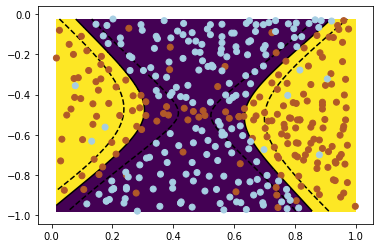

In [0]:

svm_model = svm.SVC(kernel='rbf',C=2, gamma=2)
svm_model.fit(X, y)

# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Representar el hiperplano separador
plt.axis('tight')
# Extraer lÃ­mites
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Hacer un plot a color con los resultados
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

plt.show()

**Pregunta 8: Vamos a reproducir este proceso en Python. Divide el dataset sintético dataset3.csv en dos subconjuntos aleatorios de forma estratiﬁcada, con un 75% de patrones en train y un 25% de patrones en test. Realiza el proceso de entrenamiento completo (estandarización, entrenamiento y predicción), utilizando los valores de C y γ que obtuviste en la última pregunta. Comprueba el porcentaje de buena clasiﬁcación que se obtiene para el conjunto de test. Repite el proceso más de una vez para comprobar que los resultados dependen mucho de la semilla utilizada para hacer la partición.**

Se importan los módulos necesarios.

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing

Dividimos la base de datos en 75% patrones para entrenamiendo y 25% patrones para test.

In [0]:
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25, train_size = 0.75)
for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

Estandarizamos los datos a una misma escala.

In [0]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Entrenamos nuestro sistema.

In [0]:
svm_model = svm.SVC(kernel='rbf', C=20, gamma=20)
svm_model.fit(X_train, Y_train)

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=20, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Mostramos los resultados obtenidos en generalización.

In [0]:
CCR = svm_model.score(X_test, Y_test)
print("CCR : %.2f%%" % (CCR * 100))

CCR : 73.12%


Con una configuración de C = 20 y Gamma = 20, haciendo varios experimentos, hemos obtenido los siguientes CCR:


*   CCR : 70.97%
*   CCR : 78.49%
*   CCR : 75.27%
*   CCR : 77.42%
*   CCR : 81.72%

Como podemos observar, tan solo variando las particiones aleatorias que se realizan, los porcentajes de CCR varía bastante. Pueden mejorar o empeorar los resultados en torno a un 10% en función de la partición obtenida.

**Pregunta 9: Amplía el código anterior para realizar el entrenamiento de la pregunta 8 sin necesidad de especiﬁcar los valores de C y γ. Compara los valores óptimos obtenidos para ambos parámetros con los que obtuviste a mano. Extiende el rango de valores a explorar, si es que lo consideras necesario.**

Cargamos el nuevo módulo necesario.

In [0]:
from sklearn.model_selection import GridSearchCV

Dividimos los datos de nuevo

In [0]:
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25, train_size = 0.75)
for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

Volvemos a estandarizar

In [0]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Definimos los espacios de búsqueda para los parámetros C y Gamma

In [0]:
Cs = np.logspace(-5, 15, num=11, base=2)
Gs = np.logspace(-15, 3, num=9, base=2)

Realizamos el K-Fold en busca de la configuración óptima.

In [0]:
optimo = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs, gamma=Gs), n_jobs=-1,cv=5)
optimo.fit(X_train, Y_train)

Obtenemos el CCR y los valores óptimos.

In [0]:
CCR = optimo.score(X_test, Y_test)
print("CCR: %.2f%%" % (CCR * 100))
print("\nÓptimos \n -C : %f \n -Gamma : %f" % (optimo.best_params_['C'], optimo.best_params_['gamma']))

CCR: 88.17%

Óptimos 
 -C : 2.000000 
 -Gamma : 8.000000


Algunos de los resultados obtenidos han sido los siguientes:


*   CCR: 91.40%
    - C : 0.500000 
    - Gamma : 8.000000
*   CCR: 93.55%
    - C : 2.000000 
    - Gamma : 8.000000
*   CCR: 83.87%
    - C : 2.000000
    - Gamma : 4.000000
*   CCR: 77.42%
    - C : 2.000000 
    - Gamma : 4.000000
*   CCR: 88.17%
    - C : 2.000000 
    - Gamma : 8.000000

Observamos que los resultados mejoran considerablemente respecto al ejercicio anterior. Esto puede deberse a que se realiza un número mucho mayor de combinaciones con un también más amplio rango de valores.

Podemos observar que aún así los resultados varían considerablemente unos sobre otros, esto se debe a que sigue siendo fundamental el obtener una buena división de los datos en test y entrenamiento, por lo que cuando esta es mejor, el CCR mejora, aun obteniendo los mismos valores en C y Gamma.

Con estos resultados se llega a la conclusión de que a la hora de predecir, lo más importante es obtener un buen conjunto de datos, tanto en test como en entrenamiento, ya que sin estos, por muy bien que entrene nuestro sistema, los resultados pueden ser mucho peores.





**Pregunta 10:  ¿Qué inconvenientes observas en ajustar el valor de los parámetros “a mano”, viendo el porcentaje de buena clasiﬁcación en el conjunto de test (lo que se hizo en la pregunta 8)?.**

El mayor y principal inconveniente es el hecho de tener que ir colocando los valores "a mano" uno a uno limita mucho el número de pruebas que se pueden llegar a realizar en un determinado tiempo, siendo infinitamente más rápido utilizando 'logspace'. Realizar a mano el número de pruebas que se han realizado internamente en el ejercico 9 no sería rentable, ya que requeriría a la persona de estar mucho tiempo.

**Pregunta 11:  Para estar seguros de qué has entendido como se realiza la búsqueda de parámetros, implementa de forma manual (sin usar GridSearchCV) la validación cruzada anidada tipo K-fold expuesta en esta sección. Te puede ser útil el uso de listas por compresión y la clase StratifiedKFold. Compara los resultados con los que obtienes usando GridSearchCV**

Importamos el nuevo módulo necesario

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

Dividimos los datos en entrenamiento y test.

In [0]:
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25, train_size = 0.75)
for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

Estandarizamos.

In [0]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Procedemos a dividir manualmente el conjunto de datos en 5-Fold y probamos distintas combinaciones de C y Gamma.

In [0]:
skf = StratifiedKFold(n_splits=5)

ccr = 0
best_ccr = 0

Cs = np.logspace(-5, 15, num=11, base=2) # Definimos el conjunto de valores de C
Gs = np.logspace(-15, 3, num=9, base=2)  # Definimos el conjunto de valores de Gamma
 
for i in np.nditer(Cs):  #Bucles para ir probando las distintas combinaciones de C y Gamma
  for j in np.nditer(Gs):
    svm_model = svm.SVC(kernel='rbf', C=i, gamma=j)
    ccr = 0

    for train_index, test_index in skf.split(X_train, Y_train): # Realizamos los 5-Fold para cada combinación C-Gamma
      train_fold_X, test_fold_X = X_train[train_index], X_train[test_index]
      train_fold_Y, test_fold_Y = Y_train[train_index], Y_train[test_index]

      svm_model.fit(train_fold_X, train_fold_Y)
      ccr += svm_model.score(test_fold_X, test_fold_Y)

    if ccr > best_ccr: #Buscamos la mejor combinación
      best_ccr = ccr
      best_C = i
      best_G = j


svm_model = svm.SVC(kernel='rbf', C=best_C, gamma=best_G) #Creamos un modelo a partir de los mejores valores obtenidos
svm_model.fit(X_train, Y_train)
final_ccr = svm_model.score(X_test, Y_test)

print("CCR: %.2f%%" % (final_ccr * 100))
print("\nÓptimos \n -C : %f \n -Gamma : %f" % (best_C, best_G))

CCR: 78.49%

Óptimos 
 -C : 2.000000 
 -Gamma : 8.000000


Algunos de los resultados obtenidos han sido:

*   CCR: 78.49%
    - C : 2.000000
    - Gamma : 8.000000
*   CCR: 77.42%
    - C : 0.500000 
    - Gamma : 8.000000
*   CCR: 89.25%
    - C : 2.000000
    - Gamma : 8.000000
*   CCR: 90.32%
    - C : 32.000000 
    - Gamma : 1.681793

Observamos que los resultados son prácticamente los mismo que cuando hemos realizando el K-fold y la búsqueda de los mejores parámetros mediante GridSearchCV. Esta forma tiene la desventaja de que es algo más compleja y tardía de programas. Los tiempos de ejecución son similares.

**Pregunta 12: Utiliza el script que desarrollaste en la pregunta 9 para entrenar esta base de datos. Observe el valor de CCR obtenido para el conjunto de generalización y compáralo con el obtenido en prácticas anteriores. El proceso puede demorarse bastante. Al ﬁnalizar, toma nota de los valores óptimos obtenidos para los parámetros.**

Importamos los módulos necesarios y cargamos los conjuntos de test y entrenamiento de la nueva base de datos Nomnist.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Cargar el dataset
# Cargar el dataset de train
data = pd.read_csv('train_nomnist.csv',header=None)
X_train = data.iloc[:,:-1].values
Y_train = data.iloc[:,-1].values

# Cargar el dataset de test
data = pd.read_csv('test_nomnist.csv',header=None)
X_test = data.iloc[:,:-1].values
Y_test = data.iloc[:,-1].values

Estandarizamos.

In [0]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Definimos los distintos valores que vamos a otorgar a los parámetros c y Gamma.

In [0]:
Cs = np.logspace(-5, 15, num=11, base=2)
Gs = np.logspace(-15, 3, num=9, base=2)

Creamos el objeto tipo GridSearch y entrenamos el modelo.

In [0]:
optimo = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs, gamma=Gs), n_jobs=-1,cv=5)
optimo.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=20,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([3.1250e-02, 1.2500e-01, 5.0000e-01, 2.0000e+00, 8.0000e+00,
       3.2000e+01, 1.2800e+02, 5.1200e+02, 2.0480e+03, 8.1920e+03,
       3.2768e+04]),
                         'gamma': array([3.05175781e-05, 1.45166884e-04, 6.90533966e-04, 3.28475162e-03,
       1.56250000e-02, 7.43254447e-02, 3.53553391e-01, 1.68179283e+00,
       8.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Por último mostramos el CCR obtenido y los mejores valores encontrados para C y Gamma.

In [0]:
CCR = optimo.score(X_test, Y_test)
print("CCR: %.2f%%" % (CCR * 100))
print("\nÓptimos \n -C : %f \n -Gamma : %f" % (optimo.best_params_['C'], optimo.best_params_['gamma']))

CCR: 89.67%

Óptimos 
 -C : 8.000000 
 -Gamma : 0.000145


*   CCR: 89.67%
    - C : 8.000000 
    - Gamma : 0.000145


Observamos que el CCR obtenido ha sido bastante bueno. Gamma es mucho mejor comparado con los valores obtenidos para el dataset3.
En la práctica 3, tras la ejecución se varios experimentos, se llegó a obtener un CCR del 90.64%. Aquí hemos llegado a un 89.67% de CCR.

**Pregunta 13: Localiza dónde se especiﬁca el valor de K para la validación cruzada interna y el rango de valores que se han utilizado para los parámetros C y γ. ¿Cómo podrías reducir el tiempo computacional necesario para realizar el experimento?. Prueba a establecer K = 3, K = 5 y K = 10 y compara, utilizando una tabla, los tiempos computacionales obtenidos y los resultados de CCR en test.**

Para reducir el tiempo computacinal, podríamos reducir el número K.

In [0]:
import time #Módulo necesario para poder medir tiempos de ejecución

Definimos el espacio de valores a probar de los parámetros C y Gamma.

In [0]:
Cs = np.logspace(-5, 15, num=11, base=2)
Gs = np.logspace(-15, 3, num=9, base=2)

Entrenamos nuestro sistema y medimos la duración. El parámetro 'cv' define el valor de K.

In [0]:
svm_model = svm.SVC(kernel='rbf', C=20, gamma=20)
start = time.time()
optimo = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs, gamma=Gs), n_jobs=-1,cv=10)
optimo.fit(X_train, Y_train)
end = time.time()

Mostramos los resultados obtenidos.

In [0]:
CCR = optimo.score(X_test, Y_test)
print("CCR: %.2f%%" % (CCR * 100))
print("\nÓptimos \n -C : %f \n -Gamma : %f" % (optimo.best_params_['C'], optimo.best_params_['gamma']))
print("Tiempo: %f segundos." % (end - start))

CCR: 92.00%

Óptimos 
 -C : 2.000000 
 -Gamma : 0.000691
Tiempo: 636.218769 segundos.


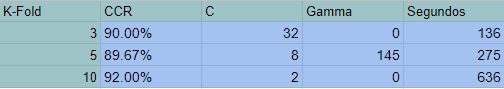

Se observa que el valor de K es el que aumenta los tiempos de ejecución, y además esto no siempre nos lleva a resultados mejores (con K=3 obtenemos mejor CCR que con K=5).

**Pregunta 14:  Debes entrenar un modelo lineal de SVM con valores C = 10−2, C = 10−1, C = 1 y C = 10. Para ello utiliza un script similar al que usaste para la pregunta 9. Compara los resultados y establece la mejor conﬁguración.**

Definimos los módulos necesarios y cargamos los conjuntos de entrenamiento y test.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Cargar el dataset
# Cargar el dataset de train
data = pd.read_csv('train_spam.csv',header=None)
X_train = data.iloc[:,:-1].values
Y_train = data.iloc[:,-1].values

# Cargar el dataset de test
data = pd.read_csv('test_spam.csv',header=None)
X_test = data.iloc[:,:-1].values
Y_test = data.iloc[:,-1].values

Definimos el modelo y lo entrenamos para extraer el CCR.

In [0]:
for c in [0.01, 0.1, 1, 10]:
    # Entrenamos el modelo SVM
    svm_model = svm.SVC(kernel='linear', C=c, gamma='auto')
    svm_model.fit(X_train, Y_train)

    # Obtenemos CCR
    CCR = svm_model.score(X_test, Y_test)
    print("C = %2f, CCR obtenido: %.2f%%" % (c, CCR * 100))

C = 0.010000, CCR obtenido: 69.20%
C = 0.100000, CCR obtenido: 70.60%
C = 1.000000, CCR obtenido: 95.30%
C = 10.000000, CCR obtenido: 97.90%


Los resultados obtenidos han sido los siguientes:

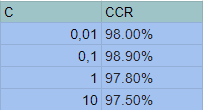

Observamos cómo de estos 4 valores de C, los mejores son 0.1 y 0.01, siendo 0.1 algo mejores, ya que alcanza el 98.9% en test. Para cualquiera de los valores de C se alcanza un CCR mayor al 97%, por lo que todos los valores son aceptables, quizás habría que probar con valores menores para encontrar uno que clasifique peor.

**Pregunta 15: Para la mejor conﬁguración, construye la matriz de confusión y establece cuáles son los correos en los que la SVM se equivoca. Consulta las variables de entrada para los correos que no se clasiﬁcan correctamente y razona el motivo. Ten en cuenta que para cada patrón, cuando Xi es igual a 1 quiere decir que la palabra i-ésima del vocabulario aparece, al menos una vez, en el correo.**

Primero importamos el módulo necesario para obtener la matriz de confusión.

In [0]:
from sklearn.metrics import confusion_matrix

Cargamos el listado de palabras para así poder comprobar cuáles son las palabras en las que se ha cometido error de clasificación.

In [0]:
# Cargamos la lista de palabras
lista_plabaras = pd.read_csv('vocab.txt', header=None, sep="\t")
indices = lista_plabaras.iloc[:,:-1].values
palabras = lista_plabaras.iloc[:,-1].values

Entrenamos el modelo con la mejor C obtenida en el ejercicio anterior (C = 10), y obtenemos el CCR de test.

In [0]:
# Entrenamos el modelo SVM
svm_model = svm.SVC(kernel='linear', C=10, gamma='auto')
svm_model.fit(X_train, Y_train)

# Obtenemos CCR
CCR = svm_model.score(X_test, Y_test)
print("CCR obtenido: %.2f%%" % ( CCR * 100))

CCR obtenido: 97.50%


Creamos y mostramos la matriz de confusión.

In [0]:
test_y_est = svm_model.predict(X_test)
m_confusion = confusion_matrix(Y_test, test_y_est)

print(m_confusion)

[[677  15]
 [ 10 298]]


La matriz de confusión ha sido : 

            [[677   15]
            [ 10 298]]

Observamos, que apenas ha habido patrones mal clasificados, solo 15 patrones clasificados como falsos negativos y 10 como falsos positivos. Esto concuerda con el CCR tan alto que hemos obtenido, 97.50%.

Por último buscamos cuales son los errores cometidos en los mensajes mal clasificados y mostramos su contenido.

In [0]:
errores = [i for i in range(Y_test.shape[0]) if Y_test[i] != test_y_est[i]] #Array con palabras mal clasificadas
es_spam = ["aceptado.", "rechazado. SPAM."]

for i in errores:
    print("Patrón %d: " % i)
    print("Mensaje", es_spam[test_y_est[i]])
    print("Contenido: ", end = "")
    palabra = [palabras[j] for j in range(X_test.shape[0]) if X_test[i, j] == 1]
    print(" ".join(palabra))
    print("")

Patrón 9: 
Mensaje aceptado.
Contenido: emailaddr for group httpaddr inform irish linux list maintain

Patrón 21: 
Mensaje rechazado. SPAM.
Contenido: an and at be by call can contact email emailaddr geek heaven httpaddr if immedi is list mail

Patrón 32: 
Mensaje rechazado. SPAM.
Contenido: about all allow and aren author bad befor believ best choic didn down emailaddr enemi few find for forc friend from go got have he histori hold hous httpaddr if in is just keep kid leader like love make

Patrón 53: 
Mensaje rechazado. SPAM.
Contenido: ag around as at be both dai discov down excit famili hour in jim kid make

Patrón 73: 
Mensaje rechazado. SPAM.
Contenido: abl about abov accept access account act addit address administr advertis advis affect affili ag again against agenc agent agre air all allow also altern am among an and ani anoth ar area as associ assum at attempt author autom avail award be becom befor begin behalf below between book box brand broadcast bug busi but button by ca

Se observa una tendencia por parte del clasificador a clasificar incorrectamente los mensajes más largos.
Un ejemplo podría ser:

**Patrón 267:**

**Mensaje rechazado. SPAM.**

**Contenido:** *about absolut accept access account acquir across act action activ ad address africa after again aid all alon alreadi also altern although america american amount an and ani anoth answer appli applic approach ar area around articl as ask associ assum at attach attempt author avail averag avoid awar back background backup bank base basi basic be becaus becom been befor begin behind below benefit best blank board bodi both box bui build busi but by call can canada card case cash catch caus center challeng chanc chang check china claim clear clearli close co code color come comfort commentari common commun compani complet comprehens comput concept confid confidenti connect consid consult consum contact contain content continu contract contribut control conveni convers copi copyright core corpor correct cost could couldn countri coupl cours cover crash creat credit critic cultur current custom dai danger data deal default delai deliv depart describ design detail develop dial differ difficult digit direct directli disabl disk displai do doe doesn dollarnumb don doubt down download due each earn easili edit either electron email emailaddr employe end engin ensur enter entir environ equal equip error especi essenti establish etc even eventu ever everi everyth exampl exchang exercis exist expens explain explor extrem fact fail featur feel few figur film final find first fit focu follow for former found franc free friend from full fulli fund further futur gain gave gener get given global good got grant great group grow guid ha had hand handl happen have he health hear help here hi high him histori hold hope host how howev http httpaddr id idea ident if immedi impact import in inc includ incred inde india indic inform initi input instal intend interact interest intern internet interview into introduc involv ireland is island issu it item itself jump just keep kei kingdom known larg largest last later latest lead learn least leav left legal less let level life limit line link list locat log look lose loss lost lot low machin made mai main major make man*

Se observa tambien que en este mensaje se utilizan muchas palabras muy parecidas.

También se clasifican como SPAM mensajes que contengan palabras relacionadas con publicidad.

**Patrón 328:** 

**Mensaje rechazado. SPAM.**

**Contenido:** *address advertis all alwai and announc been below bui close cnet com comparison custom dai download each emailaddr faq for format go have help in item juli let mail*

Este mensaje, aún conteniendo palabras como "anuncio", "hombre", "mujer", "dirección"... No es clasificado como SPAM.

**Patrón 800:** 

**Mensaje aceptado.**

**Contenido:** *ad address adult and been block chat click content dai email enter everi girl gt ha hard here hot if immedi is just like list live ll lt mail*

**Pregunta 16: Compara los resultados obtenidos con los resultados utilizando una red RBF. Para ello, haz uso del programa desarrollado en la práctica anterior. Utiliza solo una semilla (la que mejor resultado obtenga).**

Al emplear una red RBF, se obtiene un CCR de test del 99.20%, empleando un ratio de RBF del 50%, un valor de $\eta$ de $10^{-2}$ y regularización L2.

La matriz de confusión ha sido : 

            [[689  3]
             [5  302]]

Observamos que los resultados obtenidos han sido mejores, eso sí, con unos tiempos de ejecución bastante más elevados.

**Pregunta 17: Entrena una SVM no lineal y compara los resultados.**

Al entrenar el modelo como una SVM no lineal (RBF), para distintos valores de C, los resultados han sido los siguientes.

Los resultados obtenidos han sido los siguientes:

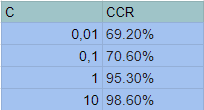

Observamos cómo de estos 4 valores de C, los mejores son 1 y 10, siendo 10 algo mejor, ya que casi alcanza el 99% en test. C = 0.01 y C = 0.1 son valores bastante malos, ya que no castigan lo suficiente los errores de clasificación.

La matriz de confusión ha sido : 

            [[688   4]
            [ 10 298]]

Observamos, que apenas ha habido patrones mal clasificados, solo 6 patrones clasificados como falsos negativos y 15 como falsos positivos. Esto concuerda con el CCR tan alto que hemos obtenido, 98.60%.